# Plot experimental data

In this notebook we load and plot the experimental data in `data/`. The data available is for three different temperatures (25 &deg;C, 10 &deg;C and 0 &deg;C) and four different C-rates (0.1C, 0.5C, 1C and 2C). For each combination of temperature and C-rate, four different cells were tested.

To start, we import the relevant packages, including the functions in `process_experimental_data.py`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tec_reduced_model.process_experimental_data import *

Now we can specify for which temperature and C-rate we want to import the data

In [2]:
Crate = 1
T = 25
dataset = import_thermal_data(Crate, T)

The imported data set is a dictionary where the key corresponds to the cell number (defined for internal identification) and the value is a pandas framework:

In [3]:
dataset

{'789':        Step Status  Step Time [s]   Time [s]  Cycle  Cycle Level    Procedure  \
 0         5    PAU          0.010      0.102      0            0  MSM_Rate_1C   
 1         5    PAU        120.046    120.138      0            0  MSM_Rate_1C   
 2         5    PAU        240.017    240.109      0            0  MSM_Rate_1C   
 3         5    PAU        360.147    360.239      0            0  MSM_Rate_1C   
 4         5    PAU        480.038    480.130      0            0  MSM_Rate_1C   
 ...     ...    ...            ...        ...    ...          ...          ...   
 47800    12    PAU       7199.096  54517.136      2            1  MSM_Rate_1C   
 47801    12    PAU       7200.030  54518.070      2            1  MSM_Rate_1C   
 47802    12    PAU       7200.030  54518.070      2            1  MSM_Rate_1C   
 47803  9999    STO          0.000  54518.103      0            0  MSM_Rate_1C   
 47804  9999    STO          0.000  54518.103      0            0  MSM_Rate_1C   
 
       

We can now plot the data for voltage and temperature

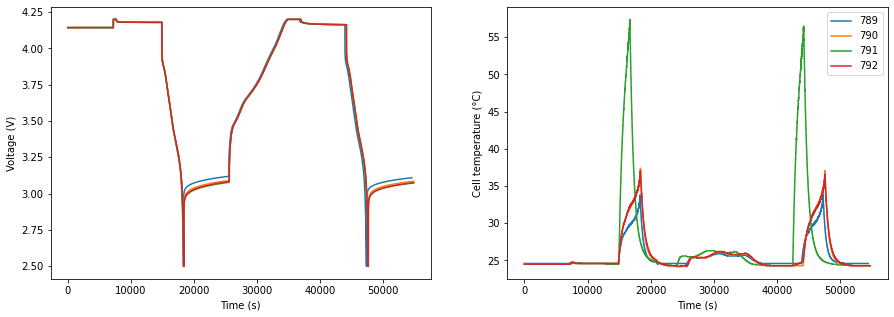

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
for cell, data in dataset.items():
    axes[0].plot(
        data["Time [s]"],
        data["Voltage [V]"],
        label=cell,
    )
    axes[1].plot(
        data["Time [s]"],
        data["Temp Cell [degC]"],
        label=cell,
    )

axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Voltage (V)")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Cell temperature (°C)")
axes[1].legend()

Note that the data contains two discharge cycles. To get the indices of where the cycles start and end, we can use the method `get_idxs` (imported from `process_experimental_data`). The function takes two arguments `I_dch` and `I_ch` which are the discharge and charge currents, respectively. It then returns two numpy arrays: the first with the indices when discharge starts and the second with the indices when charge starts (or, equivalently, relaxation ends).

Then, we can plot the first discharge cycle only using

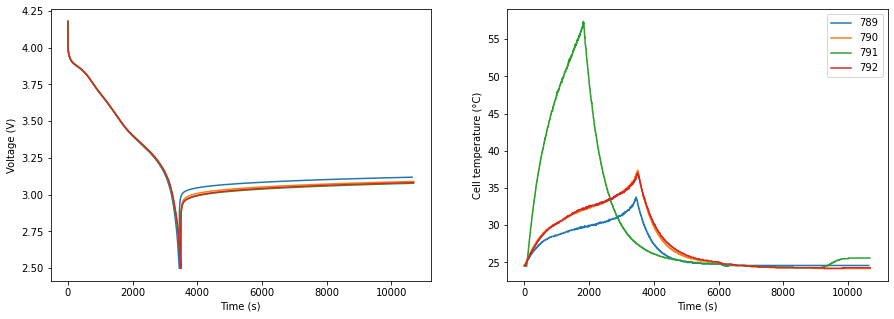

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
for cell, data in dataset.items():
    idx_start, idx_end = get_idxs(data, Crate * 5, 5 / 3)
    if len(idx_end) == 1:
        idx_end = np.append(idx_end, len(data["Time [s]"]))
    axes[0].plot(
        data["Time [s]"][idx_start[0] : idx_end[1]]
        - data["Time [s]"][idx_start[0]],
        data["Voltage [V]"][idx_start[0] : idx_end[1]],
        label=cell,
    )
    axes[1].plot(
        data["Time [s]"][idx_start[0] : idx_end[1]]
        - data["Time [s]"][idx_start[0]],
        data["Temp Cell [degC]"][idx_start[0] : idx_end[1]],
        label=cell,
    )

axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Voltage (V)")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Cell temperature (°C)")
axes[1].legend()